<a href="https://colab.research.google.com/github/emayssat/colab-public/blob/main/torch_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with iris

In this colab, we build a an iris recognition engine based on a dataset provided in sklearn 

---
## Links
* Sklearn - https://scikit-learn.org/stable/index.html
* Source document - https://janakiev.com/blog/pytorch-iris/


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
type(iris)

sklearn.utils.Bunch

## sklearn.utils.Bunch
Container object exposing keys as attributes.

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

More at https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Let's print the description of the dataset contained in the Bunch object

In [41]:
print(iris.DESCR[:190],'...', '\n' * 3)
print(iris.feature_names)
print(iris.target_names)
print(iris.data[:5])
print(iris.target[:5])
# iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric,  ... 



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [42]:
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
target_names = iris['target_names']

print(target_names)
print(feature_names)

X[:5]

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Understanding Scaler

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



In [16]:
_data = [[0, 0], [0, 0], [1, 1], [1, 1]]
_scaler = StandardScaler()

# Compute mean and std-deviation of the dataset
print(_scaler.fit(_data))
# StandardScaler()
print(_scaler.mean_)
# [0.5 0.5]
print(_scaler.var_)
# [0.25, 0.25]
print(_scaler.transform(_data))
# [[-1. -1.]
#  [-1. -1.]
#  [ 1.  1.]
#  [ 1.  1.]]

# Apply transformation on another sample
# Note that this sample is not used in the computation of the mean and variance
print(_scaler.transform([[2, 2]]))
# [[3. 3.]]

StandardScaler()
[0.5 0.5]
[0.25 0.25]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


## Training and testing sets
Let's separate the dataset in 2: 
1. the training-set (100%-20%)
1. and the test-set (20% of dataset)

In [28]:
# Split the data set into training (100%-20%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)
print("y_data", len(y), "=", "y_train", len(y_train), "+", "y_test", len(y_test))
print("X_data", len(X_scaled), "=", "X_train", len(X_train), 'X_test', len(X_test))
print('X_train[0]', X_train[0], "y_train", y_train[0])
print(target_names)
print(feature_names)


y_data 150 = y_train 120 + y_test 30
X_data 150 = X_train 120 X_test 30
X_train[0] [ 0.4321654  -0.59237301  0.59224599  0.79067065] y_train 2
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Visualize the Data
Let’s take a look at our data to see what we are dealing with.

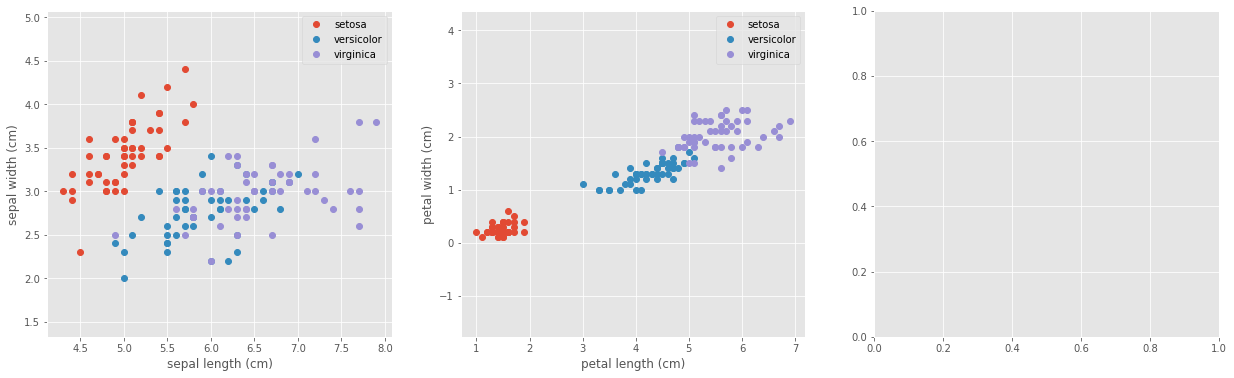

In [49]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Left plot
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

# Right plot
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();